In [1]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("mean-monthly-nile-river-flow-cms.csv")

In [3]:
df.head()

,Month,river
0,1870-01,99.032
1,1870-02,59.000
2,1870-03,47.097
3,1870-04,46.667
4,1870-05,261.613


In [4]:
river = []
flow = 0
for i in range(len(df.river.values)):
    if (i % 3 == 0): flow = 0
    flow += df.river.values[i]
    if (i % 3 == 2): river.append(flow)

In [5]:
df = pd.DataFrame({"river": river})

In [6]:
df["lag1"] = df.river.shift(1)
df["lag2"] = df.river.shift(2)
df["lag3"] = df.river.shift(3)
df["lag4"] = df.river.shift(4)

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 4 to 302
Data columns (total 5 columns):
river    299 non-null float64
lag1     299 non-null float64
lag2     299 non-null float64
lag3     299 non-null float64
lag4     299 non-null float64
dtypes: float64(5)
memory usage: 14.0 KB


In [9]:
uki = [0,1,1,0]* 80
df["uki"] = uki[:299]

In [10]:
N = -100
X_train = df[["lag1","lag2","lag3","lag4","uki"]][:N].values
X_test = df[["lag1","lag2","lag3","lag4","uki"]][N:].values
y_train = df.river[:N].values
y_test = df.river[N:].values

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
forest = RandomForestRegressor(
    n_estimators=10,
    criterion='mse')

In [13]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [14]:
# 予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

MSE train : 7637.919, test : 30600.648
MSE train : 0.978, test : 0.861


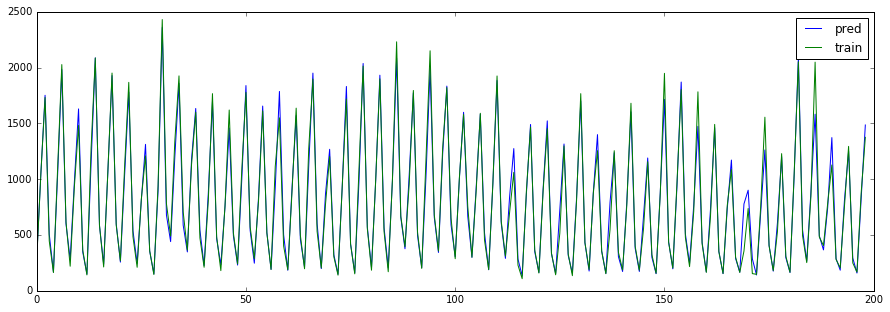

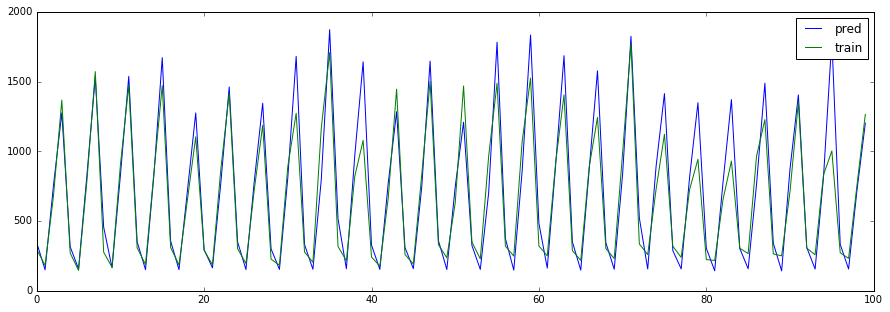

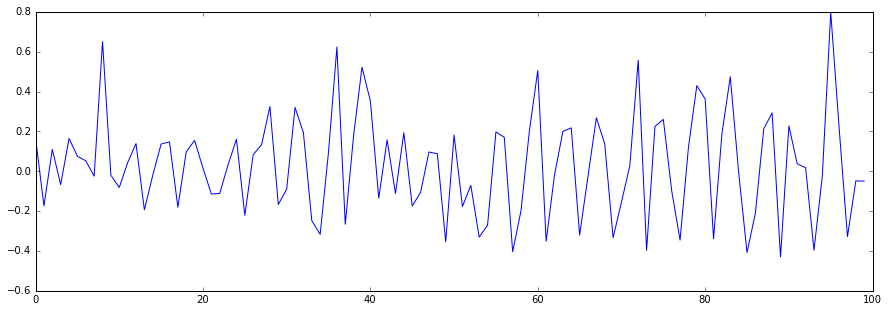

In [15]:
plt.figure(figsize=(15,5))
plt.plot(y_train_pred,label="pred")
plt.plot(y_train,label="train")
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot(y_test_pred,label="pred")
plt.plot(y_test,label="train")
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.plot((y_test_pred-y_test)/y_test)
plt.show()